In [1]:
from functions import *


## Procesamiento de datos

In [2]:
#cargar datos
paths = {
        "df1": "C:/Users/osanc/Desktop/IronHack/Sem_3/Proyecto/pip.csv",
        "df2": "C:/Users/osanc/Desktop/IronHack/Sem_3/Proyecto/expected-years-of-schooling-vs-share-in-extreme-poverty.csv",
        "df3": "C:/Users/osanc/Desktop/IronHack/Sem_3/Proyecto/total-government-expenditure-on-education-gdp.csv",
        "df4": "C:/Users/osanc/Desktop/IronHack/Sem_3/Proyecto/country-coord.csv"
    }
dfs = load_data(paths)

In [3]:
#limpiar columnas

rename_columns_dict = {
    'df2': {"expected_years_of_schooling": "expected_years_school"},
    'df3': {"historical_and_more_recent_expenditure_estimates": "spend_public_education"},
    'df4': {"alpha-3_code": "country_code", "latitude_(average)": "latitude", "longitude_(average)": "longitude"}
}

dfs = clean_columns(dfs, rename_columns_dict)

In [4]:
#unir DataFrames

merge_keys = {
    'df1': ['country_code', 'reporting_year'],
    'df2': ['code', 'year'],
    'df3': ['code', 'year'],
    'df4': ['country_code', 'latitude']
}

# Columnas a seleccionar antes de la fusión
join_columns = {
    'df1': ['region_name', 'region_code', 'country_name', 'country_code', 'reporting_year', 'gini', 'poverty_line', 'headcount', 'poverty_gap', 'reporting_pop', 'reporting_gdp', 'codigo'],
    'df2': ['codigo', 'expected_years_school'],
    'df3': ['codigo', 'spend_public_education'],
    'df4': ['country_code', 'latitude', 'longitude']
}

df_merged = merge_dfs(dfs, merge_keys, join_columns)

In [5]:
#formateando columnas

df_merged = convertir_anio_a_fecha(df_merged, "reporting_year", formato='%Y')

In [6]:
#Limite investigacion
df_merged = limit_analitic(df_merged, "reporting_year", start_year=2000, end_year=2019)

In [7]:
#Limpieza de valores nulos

columns_to_fill = ['expected_years_school', 'spend_public_education']

df_merged = clean_nulls(df_merged, columns_to_fill, "country_name", fill_method='mean')

## EDA

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, 0 to 2498
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   region_name             1633 non-null   object        
 1   region_code             1633 non-null   object        
 2   country_name            1633 non-null   object        
 3   country_code            1633 non-null   object        
 4   reporting_year          1633 non-null   datetime64[ns]
 5   gini                    1633 non-null   float64       
 6   poverty_line            1633 non-null   float64       
 7   headcount               1633 non-null   float64       
 8   poverty_gap             1633 non-null   float64       
 9   reporting_pop           1633 non-null   float64       
 10  reporting_gdp           1633 non-null   float64       
 11  codigo                  1633 non-null   object        
 12  expected_years_school   1633 non-null   float64      

In [9]:
pd.options.display.float_format = '{:.3f}'.format

df_merged.describe()

reporting_year     gini  poverty_line  headcount  \
count                           1633 1633.000      1633.000   1633.000   
mean   2010-02-05 10:27:51.034905088    0.369         2.150      0.073   
min              2000-01-01 00:00:00    0.232         2.150      0.000   
25%              2005-01-01 00:00:00    0.308         2.150      0.002   
50%              2010-01-01 00:00:00    0.352         2.150      0.010   
75%              2015-01-01 00:00:00    0.416         2.150      0.074   
max              2019-01-01 00:00:00    0.648         2.150      0.840   
std                              NaN    0.082         0.000      0.139   

       poverty_gap  reporting_pop  reporting_gdp  expected_years_school  \
count     1633.000       1633.000       1633.000               1633.000   
mean         0.025   67516740.425      20939.009                 14.111   
min          0.000      24945.000        293.290                  3.529   
25%          0.001    4490967.000       3298.323                 12.519   
50%          0.004   10325452.000       8376.149                 14.473   
75%          0.022   46576897.000      21541.176                 15.980   
max          0.436 1407745000.000    2533324.266                 23.083   
std          0.056  186875317.521     101481.717                  2.772   

       spend_public_education  latitude  longitude  
count                1633.000  1633.000   1633.000  
mean                    4.565    29.039     14.832  
min                     1.151   -34.000   -175.000  
25%                     3.542    10.000     -8.000  
50%                     4.423    39.000     20.000  
75%                     5.417    48.667     35.000  
max                    13.574    65.000    175.000  
std                     1.461    25.939     59.865

In [11]:
pd.set_option('display.max_rows', None)
df_merged.groupby(["region_name","country_name"]).agg({
    'gini': 'mean',
    'headcount': 'mean',
    "expected_years_school":"mean",
    "spend_public_education":"mean"})

gini  headcount  \
region_name                 country_name                                
East Asia & Pacific         China                    0.374      0.086   
                            Fiji                     0.365      0.011   
                            Indonesia                0.348      0.192   
                            Kiribati                 0.324      0.079   
                            Lao PDR                  0.357      0.157   
                            Malaysia                 0.435      0.005   
                            Marshall Islands         0.355      0.009   
                            Micronesia, Fed. Sts.    0.486      0.227   
                            Mongolia                 0.333      0.022   
                            Myanmar                  0.344      0.041   
                            Philippines              0.436      0.111   
                            Samoa                    0.405      0.015   
                            Thailand                 0.388      0.006   
                            Timor-Leste              0.308      0.354   
                            Tonga                    0.362      0.020   
                            Vanuatu                  0.348      0.123   
                            Viet Nam                 0.362      0.095   
Europe & Central Asia       Albania                  0.329      0.015   
                            Armenia                  0.320      0.030   
                            Azerbaijan               0.283      0.013   
                            Belarus                  0.276      0.016   
                            Bulgaria                 0.359      0.019   
                            Croatia                  0.312      0.005   
                            Czechia                  0.261      0.000   
                            Estonia                  0.333      0.008   
                            Georgia                  0.378      0.114   
                            Hungary                  0.296      0.002   
                            Kazakhstan               0.299      0.022   
                            Kyrgyz Republic          0.301      0.096   
                            Latvia                   0.357      0.009   
                            Lithuania                0.353      0.010   
                            Moldova                  0.316      0.048   
                            North Macedonia          0.378      0.044   
                            Poland                   0.329      0.002   
                            Romania                  0.322      0.029   
                            Russian Federation       0.387      0.004   
                            Serbia                   0.334      0.022   
                            Slovak Republic          0.266      0.003   
                            Slovenia                 0.254      0.000   
                            Tajikistan               0.327      0.168   
                            Turkiye                  0.411      0.009   
                            Ukraine                  0.265      0.003   
Latin America & Caribbean   Argentina                0.456      0.027   
                            Bolivia                  0.507      0.094   
                            Brazil                   0.546      0.071   
                            Chile                    0.480      0.021   
                            Colombia                 0.535      0.092   
                            Costa Rica               0.489      0.027   
                            Dominican Republic       0.477      0.047   
                            Ecuador                  0.489      0.077   
                            El Salvador              0.447      0.071   
                            Grenada                  0.438      0.003   
                            Guatemala                0.523      0.103   
                            Honduras   

## Grafico 1

### Análisis del Mapa del Índice de Gini

El mapa presenta la distribución del **Índice de Gini** a nivel mundial, un indicador que mide la desigualdad en los ingresos. A mayor valor del índice (más cercano a 1), mayor es la desigualdad en un país; un valor cercano a 0 refleja una distribución más equitativa de la riqueza.

- **Desigualdad en América Latina y África Subsahariana**: Las regiones de **América Latina** y **África Subsahariana** destacan por tener los índices más altos, como en **Sudáfrica** (0.624) y **Brasil** (0.546), lo que indica una gran disparidad en la distribución de ingresos.
- **Mayor equidad en Europa y Asia**: En contraste, algunos países de **Europa** y **Asia** presentan los índices más bajos, como **Eslovenia** (0.254) y **Bielorrusia** (0.276), lo que refleja sistemas económicos más equitativos.

Este análisis proporciona una visión general sobre cómo se distribuye la desigualdad de ingresos globalmente.


In [13]:
import nbformat
print(nbformat.__version__)

import plotly.io as pio
pio.renderers.default = 'notebook'

import plotly.express as px


# Crear el mapa
fig = px.scatter_geo(df_merged,
                     lat='latitude',
                     lon='longitude',
                     hover_name='country_name',  # Nombre del país al pasar el mouse
                     size='gini',     # Tamaño de los puntos basado en el índice de Gini
                     color='gini',    # Color basado en el índice de Gini
                     color_continuous_scale='Viridis',  # Escala de color
                     projection="natural earth")  # Proyección del mapa

# Título y mostrar el mapa
fig.update_layout(title="Índice de Gini por Países")
fig.show()

5.9.2


## Grafico 2

In [14]:
import plotly.express as px

# Crear el mapa coroplético
fig = px.choropleth(df_merged,
                    locations="country_code",  # Código de país en formato ISO Alpha-3
                    color="gini",  # Variable a usar para el color (índice de Gini)
                    hover_name="country_name",  # Nombre del país al pasar el mouse
                    color_continuous_scale='Viridis',  # Escala de color
                    projection="natural earth")  # Proyección del mapa

# Actualizar el diseño: tamaño de la figura y título centrado
fig.update_layout(
    title={
        'text': "Índice de Gini por Países",
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    width=1000,  # Ancho del gráfico
    height=500  # Alto del gráfico
)

# Mostrar el gráfico
fig.show()

## Grafico 3

### Análisis del Gráfico de Dispersión: Índice de Gini vs. Expectativas de Educación

Este gráfico de dispersión compara el **Índice de Gini** (que mide la desigualdad en los ingresos) con las **expectativas de años de escolarización** en distintos países. El análisis revela varios patrones interesantes:

- **Tendencia inversa**: En general, se observa que los países con **mayor desigualdad de ingresos** (índices de Gini más altos) tienden a tener **menores expectativas de años de escolarización**. Por ejemplo, países como **Sudáfrica** y **Brasil** muestran altos índices de desigualdad y expectativas educativas relativamente bajas.
- **Menor desigualdad, mayor educación**: Por otro lado, países con **índices de Gini bajos**, como **Eslovenia** y **Finlandia**, tienen mayores expectativas de años de educación, lo que sugiere una correlación positiva entre **equidad en ingresos** y **mejores perspectivas educativas**.
- **Casos atípicos**: Sin embargo, algunos países presentan valores atípicos, como **Botswana**, que muestra un alto nivel de desigualdad pero con expectativas de educación relativamente altas.

Este gráfico refleja la relación entre la equidad económica y el acceso o expectativa educativa, sugiriendo que la desigualdad de ingresos puede tener un impacto negativo en las oportunidades educativas.


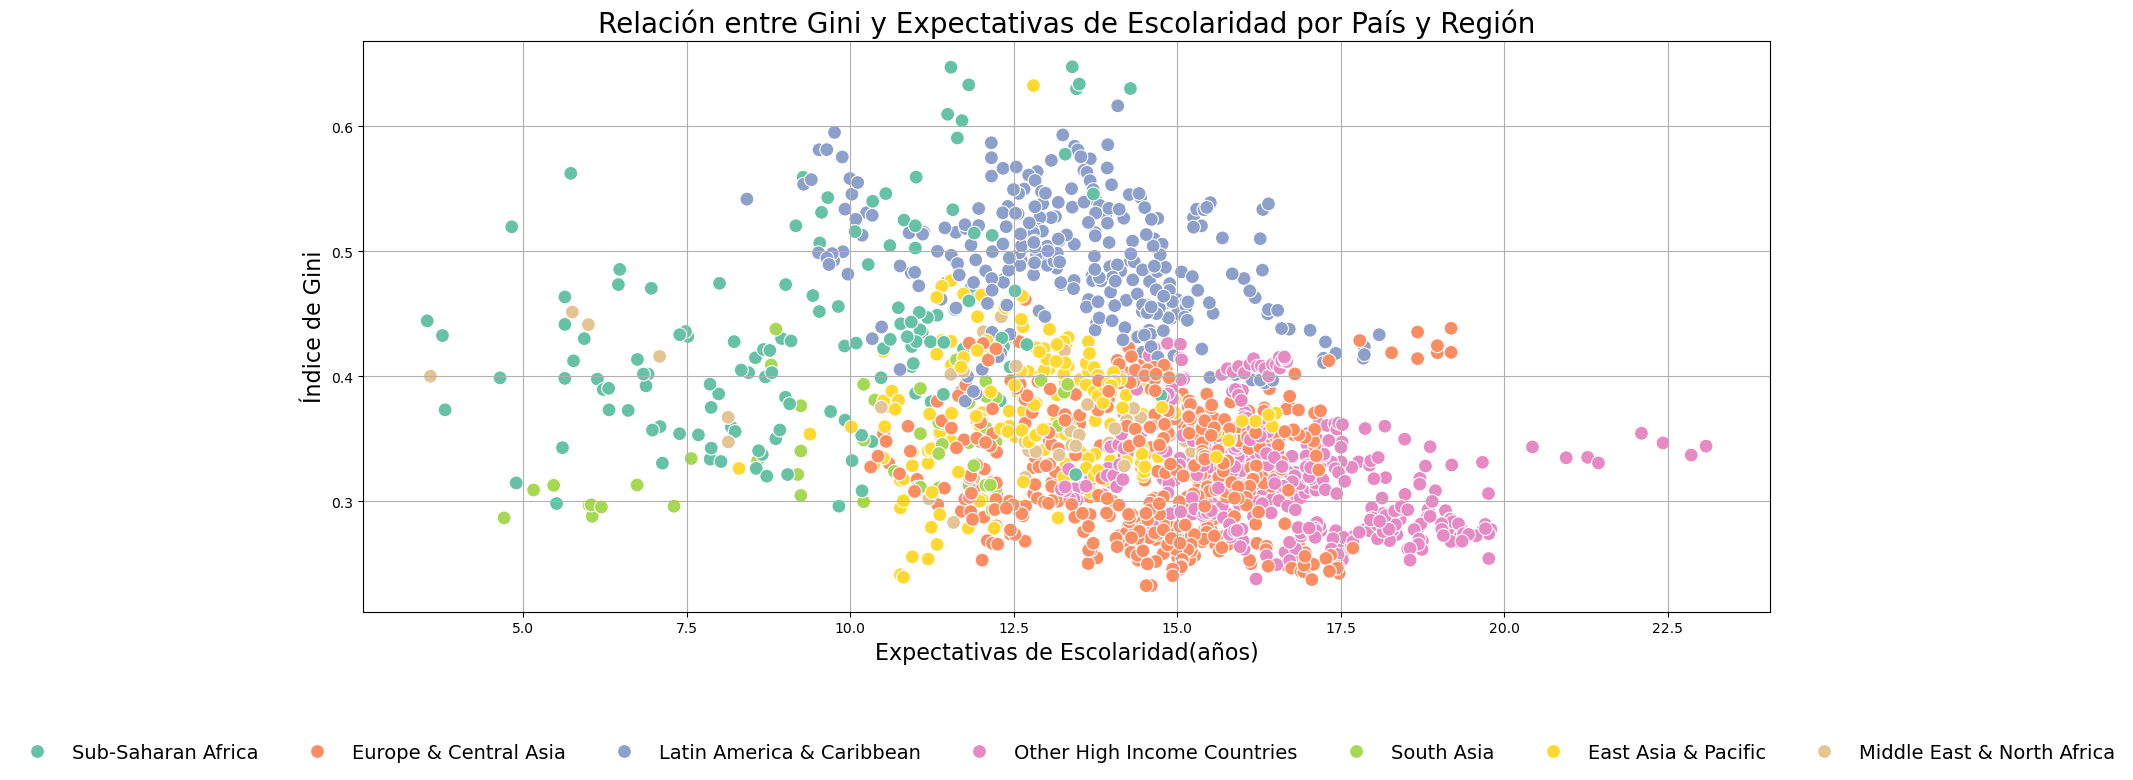

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las columnas necesarias
df_filtered = df_merged[['country_name', 'gini', 'expected_years_school', 'region_name']].dropna()

# Crear el gráfico de dispersión
plt.figure(figsize=(20, 8))
scatter_plot = sns.scatterplot(data=df_filtered, 
                x='expected_years_school', 
                y='gini', 
                hue='region_name',   # Color según la región
                s=100,  # Tamaño de los puntos
                palette='Set2')  # Paleta de colores para regiones

# Añadir título y etiquetas con tamaños ajustados
plt.title('Relación entre Gini y Expectativas de Escolaridad por País y Región', fontsize=20)
plt.xlabel('Expectativas de Escolaridad(años)', fontsize=16)
plt.ylabel('Índice de Gini', fontsize=16)

# Configurar la leyenda
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', 
           fontsize=14, ncol=len(df_filtered['region_name'].unique()), 
           frameon=False)  # ncol ajusta el número de columnas para abarcar todo el ancho

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()  # Ajustar el diseño para que no se corte la leyenda
plt.show()

## Grafico 4

### Análisis de la Relación entre el Índice de Gini y la Pobreza por País y Región

Este gráfico explora la relación entre el **Índice de Gini**, que mide la desigualdad en los ingresos, y los niveles de **pobreza** en distintos países y regiones. Los hallazgos son los siguientes:

- **Correlación positiva**: Se observa una tendencia en la que los países con un **índice de Gini más alto** (mayor desigualdad) suelen tener **tasas de pobreza más elevadas**. Esto sugiere que la desigualdad económica puede contribuir a la perpetuación de la pobreza, limitando el acceso a recursos y oportunidades.
- **Regiones en desventaja**: Las regiones como **África Subsahariana** y **América Latina** presentan los niveles más altos de desigualdad y pobreza, reflejando desafíos estructurales que afectan a estas sociedades.
- **Casos destacados**: Algunos países con alta desigualdad, como **Botswana**, presentan niveles de pobreza relativamente bajos, lo que indica que el contexto local y las políticas sociales pueden influir en esta dinámica.
- **Implicaciones políticas**: La relación observada resalta la importancia de implementar políticas que aborden tanto la desigualdad como la pobreza de manera conjunta, para lograr un desarrollo más equitativo y sostenible.

Este análisis sugiere que una reducción de la desigualdad puede ser crucial para disminuir la pobreza y mejorar la calidad de vida en diversas regiones.


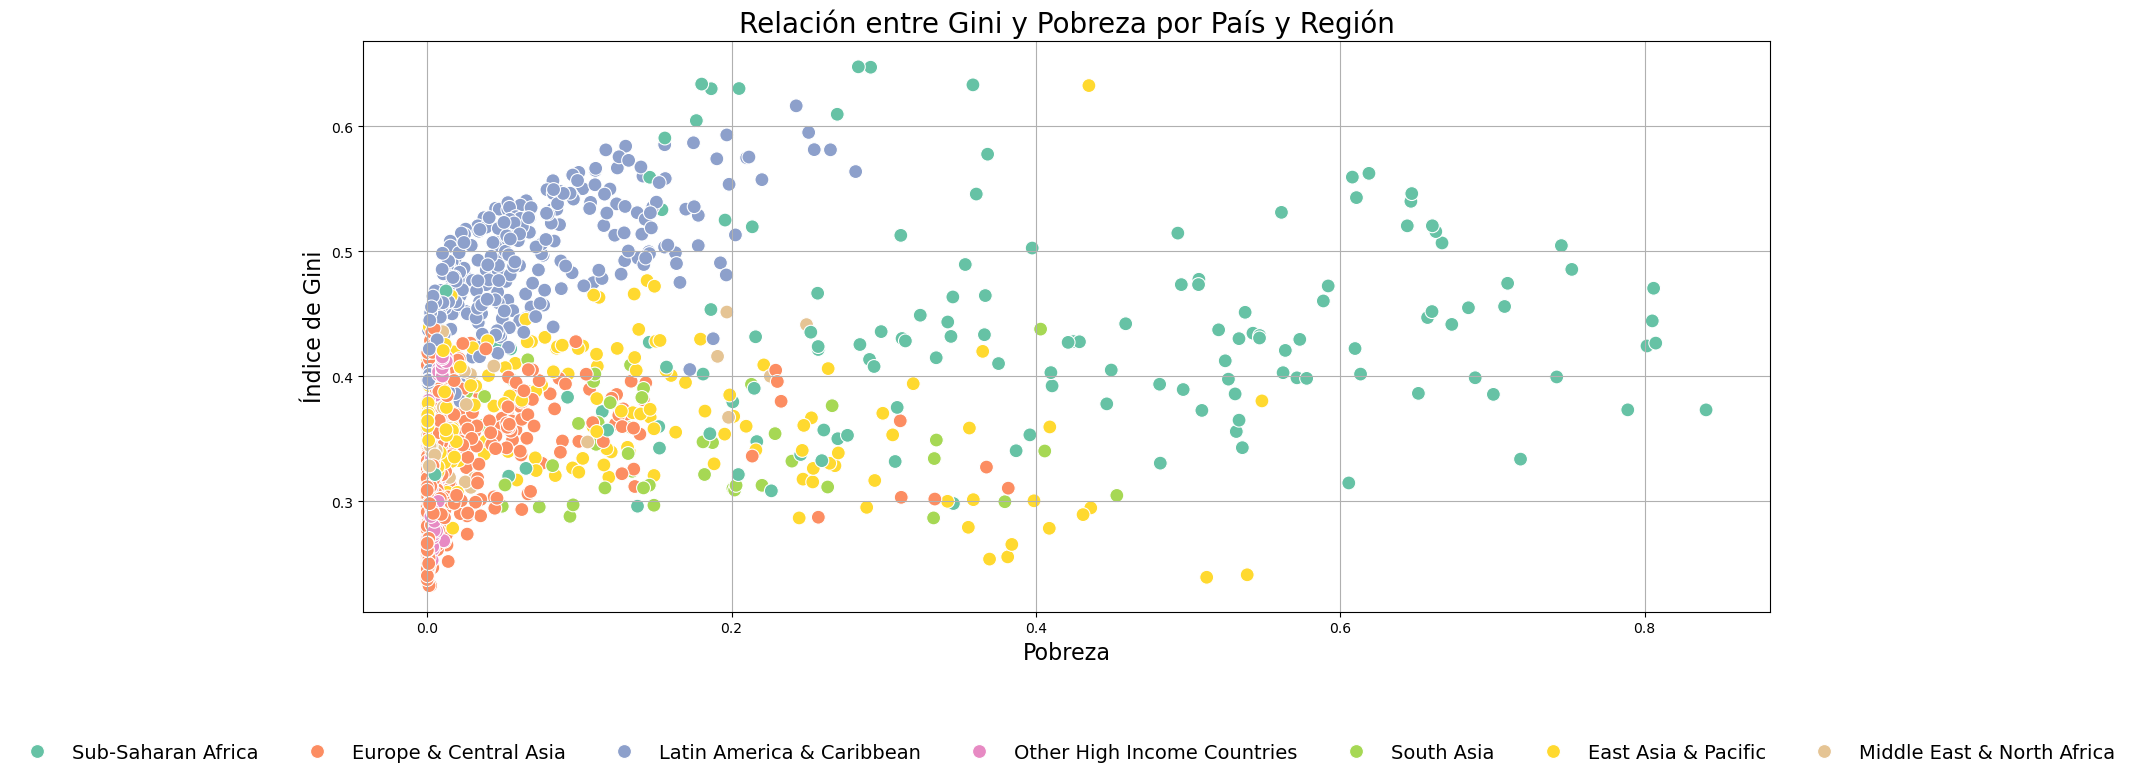

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las columnas necesarias
df_filtered = df_merged[['country_name', 'gini', 'headcount', 'region_name']].dropna()

# Crear el gráfico de dispersión
plt.figure(figsize=(20, 8))
scatter_plot = sns.scatterplot(data=df_filtered, 
                x='headcount', 
                y='gini', 
                hue='region_name',   # Color según la región
                s=100,  # Tamaño de los puntos
                palette='Set2')  # Paleta de colores para regiones

# Añadir título y etiquetas
plt.title('Relación entre Gini y Pobreza por País y Región', fontsize = 20)
plt.xlabel('Pobreza', fontsize = 16)
plt.ylabel('Índice de Gini', fontsize = 16)

# Configurar la leyenda
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', 
           fontsize=14, ncol=len(df_filtered['region_name'].unique()), 
           frameon=False)  # ncol ajusta el número de columnas para abarcar todo el ancho

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()  # Ajustar el diseño para que no se corte la leyenda
plt.show()

## Grafico 5

### Análisis de la Relación entre Pobreza y Educación por País y Región

Este gráfico examina la relación entre los niveles de **pobreza** y las **expectativas educativas** en diferentes países y regiones. Los hallazgos son los siguientes:

- **Tendencia inversa**: Se observa que los países con **altos niveles de pobreza** tienden a tener **bajas expectativas educativas**. Esta correlación sugiere que la pobreza puede limitar el acceso a una educación de calidad, afectando las oportunidades futuras de las personas.
- **Impacto regional**: Regiones como **África Subsahariana** y **América Latina** presentan combinaciones significativas de pobreza y bajas tasas de escolarización, lo que resalta los desafíos socioeconómicos que enfrentan.
- **Excepciones notables**: Algunos países, como **Bangladesh**, muestran avances en educación a pesar de niveles de pobreza más altos, indicando que las inversiones en educación pueden contribuir a mejorar la situación a largo plazo.
- **Implicaciones para políticas públicas**: Este análisis destaca la necesidad de políticas integradas que aborden tanto la pobreza como la educación, promoviendo programas que faciliten el acceso educativo para los sectores más vulnerables.

En resumen, la relación entre pobreza y educación subraya la importancia de invertir en educación como un medio para combatir la pobreza y fomentar un desarrollo sostenible en diversas regiones.


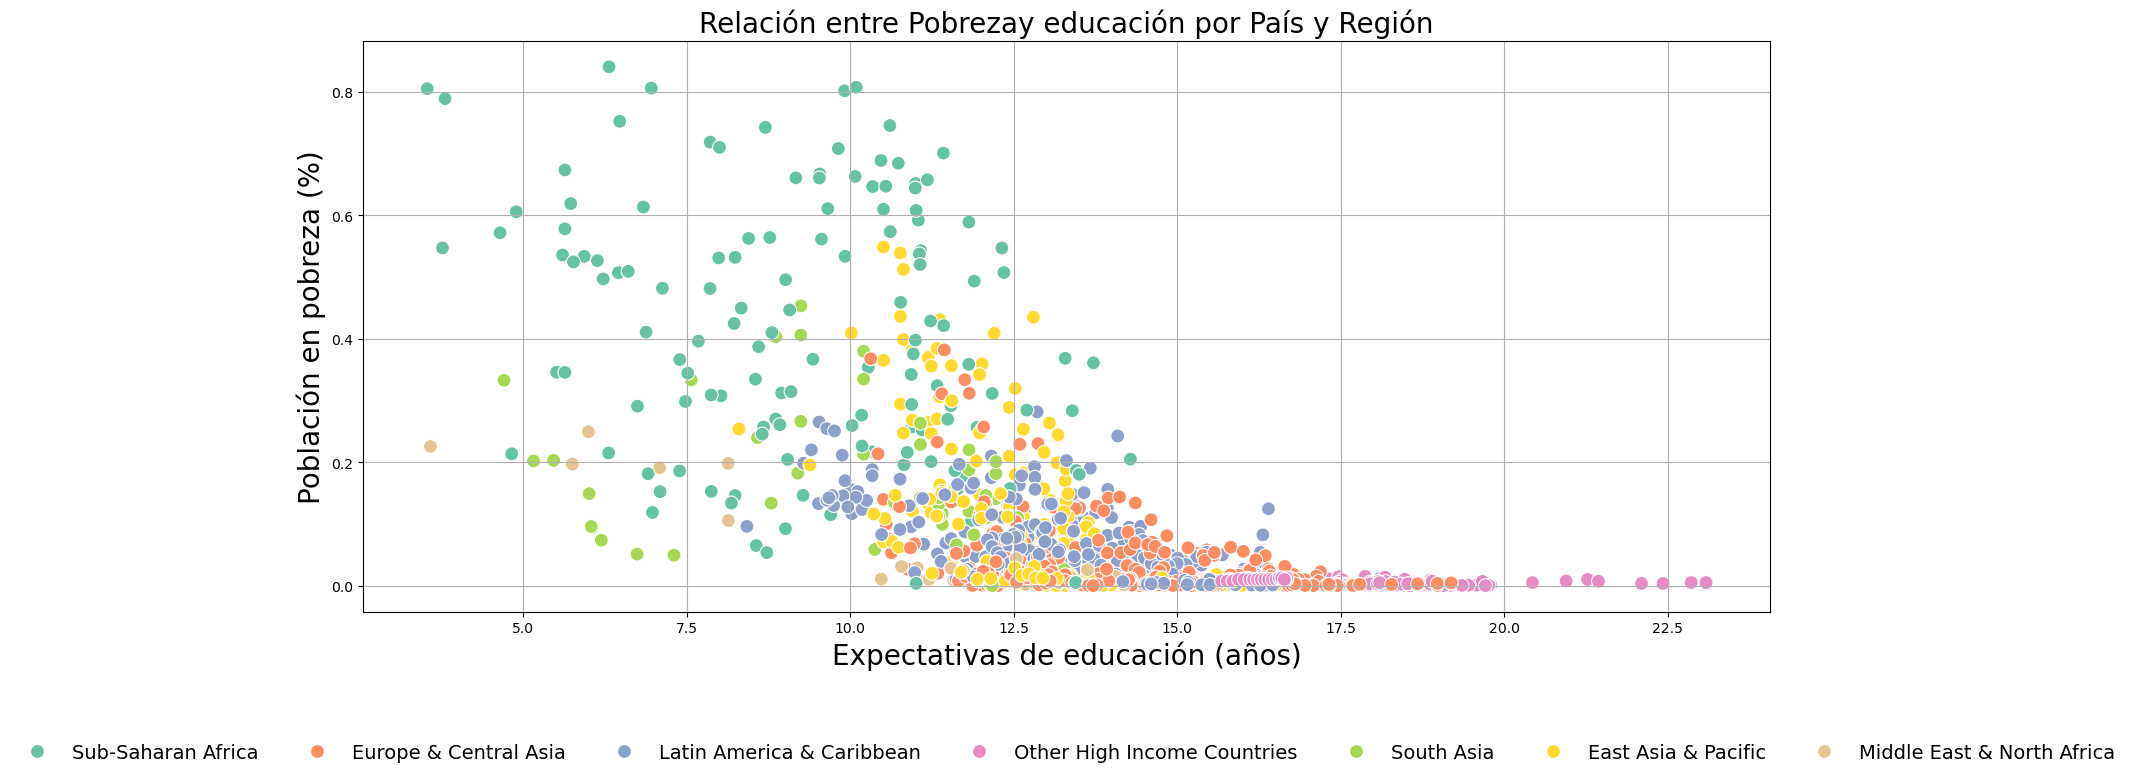

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las columnas necesarias
df_filtered = df_merged[['country_name','expected_years_school', 'headcount', 'region_name']].dropna()

# Crear el gráfico de dispersión
plt.figure(figsize=(20, 8))
scatter_plot = sns.scatterplot(data=df_filtered, 
                x='expected_years_school', 
                y='headcount', 
                hue='region_name',   # Color según la región
                s=100,  # Tamaño de los puntos
                palette='Set2')  # Paleta de colores para regiones

# Añadir título y etiquetas
plt.title('Relación entre Pobrezay educación por País y Región', fontsize = 20)
plt.xlabel('Expectativas de educación (años)',fontsize = 20)
plt.ylabel('Población en pobreza (%)',fontsize = 20)

# Configurar la leyenda
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', 
           fontsize=14, ncol=len(df_filtered['region_name'].unique()), 
           frameon=False)  # ncol ajusta el número de columnas para abarcar todo el ancho

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()  # Ajustar el diseño para que no se corte la leyenda
plt.show()

## Grafico 6

### Análisis de la Evolución Regional: Expectativas de Escolaridad e Índice de Gini

Este bloque de gráficos presenta la evolución de las **expectativas de escolaridad** y el **índice de Gini** a lo largo del tiempo, desglosado por región. Los hallazgos son los siguientes:

- **Tendencias en las expectativas de escolaridad**: En general, muchas regiones han mostrado un aumento en las expectativas de escolaridad, lo que sugiere mejoras en el acceso a la educación y una creciente inversión en capital humano. Las regiones como **Asia Oriental** y **Europa** presentan avances notables, indicando un compromiso con la educación.

- **Evolución del índice de Gini**: A medida que las expectativas de escolaridad aumentan, algunos gráficos reflejan una tendencia a la disminución del índice de Gini en ciertas regiones, lo que indica una posible reducción de la desigualdad en los ingresos. Sin embargo, en regiones como **América Latina**, el índice de Gini se mantiene alto, lo que sugiere que el crecimiento educativo no ha sido suficiente para abordar las desigualdades económicas.

- **Interacción entre variables**: La comparación entre ambos ejes sugiere que el aumento en las expectativas educativas podría estar relacionado con la reducción de la desigualdad en algunos contextos, mientras que en otros, la persistente desigualdad limita los beneficios del crecimiento educativo.


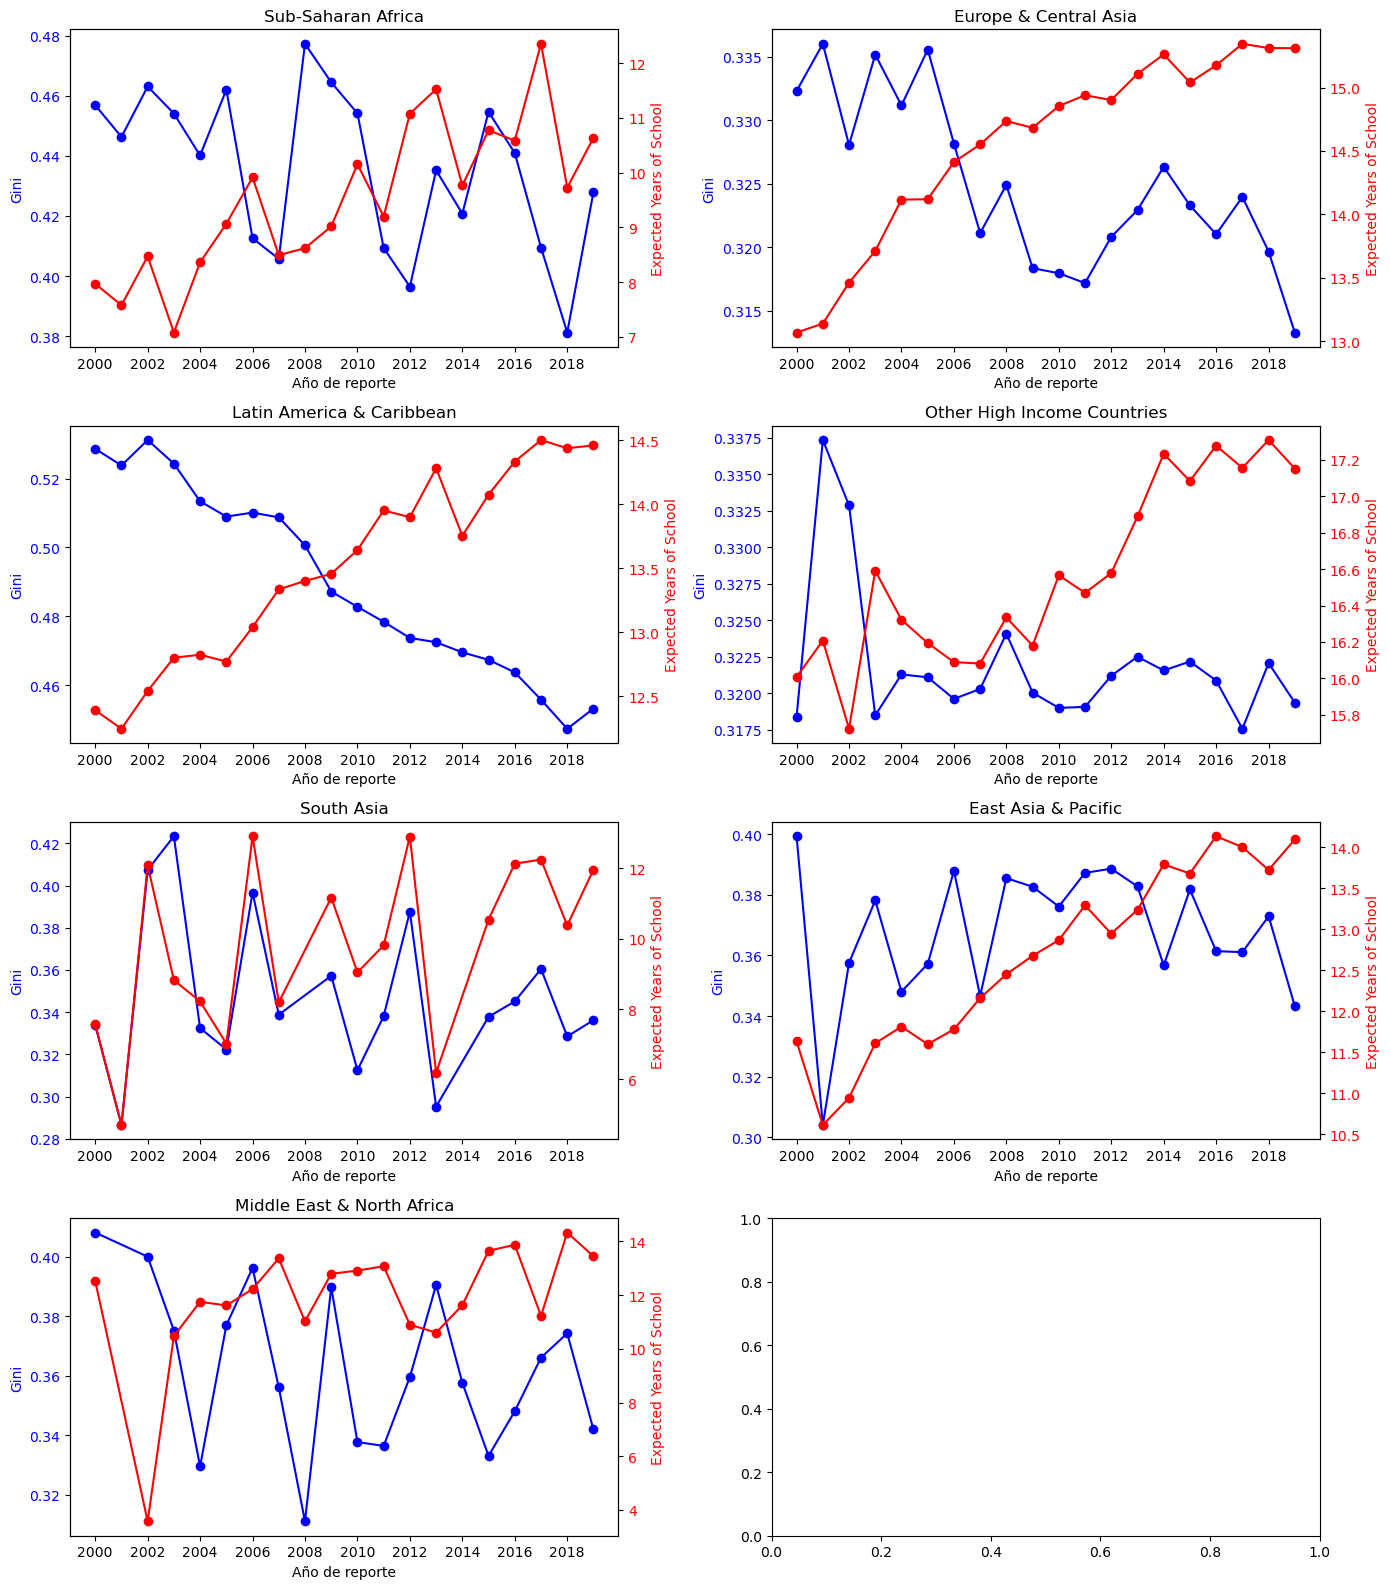

In [18]:
import matplotlib.pyplot as plt

# Lista de países a incluir en el análisis
regiones = ['Sub-Saharan Africa', 'Europe & Central Asia', 'Latin America & Caribbean', 'Other High Income Countries', 'South Asia', 'East Asia & Pacific', 'Middle East & North Africa']

# Filtrar el DataFrame para los países seleccionados
df_filtered = df_merged[df_merged['region_name'].isin(regiones)]

# Crear la estructura de subplots (en este caso 4 filas, 2 columnas para 8 países)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()  # Convertir el array de ejes en una lista plana para fácil acceso

# Iterar a través de los países y crear un gráfico para cada uno
for i, region in enumerate(regiones):
    # Filtrar los datos para el país específico
    df_pais = df_filtered[df_filtered['region_name'] == region]

    # Derretir el DataFrame para crear la tabla dinámica como antes
    df_pivot = df_pais.melt(id_vars=['region_name', 'reporting_year'], 
                            value_vars=['gini', 'expected_years_school'], 
                            var_name='indicator')

    # Crear la tabla dinámica
    result = df_pivot.pivot_table(index='indicator', columns='reporting_year', values='value')

    # Seleccionar el eje actual
    ax1 = axes[i]

    # Graficar el primer indicador ('gini') en el eje principal (ax1)
    ax1.plot(result.columns, result.loc['gini'], marker='o', color='b', label='Gini')

    # Añadir etiquetas para el primer eje
    ax1.set_xlabel('Año de reporte')
    ax1.set_ylabel('Gini', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Crear un segundo eje (ax2) que comparte el mismo eje x con ax1
    ax2 = ax1.twinx()

    # Graficar el segundo indicador ('expected_years_school') en el eje secundario (ax2)
    ax2.plot(result.columns, result.loc['expected_years_school'], marker='o', color='r', label='Expected Years of School')

    # Añadir etiquetas para el segundo eje
    ax2.set_ylabel('Expected Years of School', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Título del subgráfico para el país
    ax1.set_title(f'{region}')

# Ajustar el layout para que los subgráficos no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Grafico 7

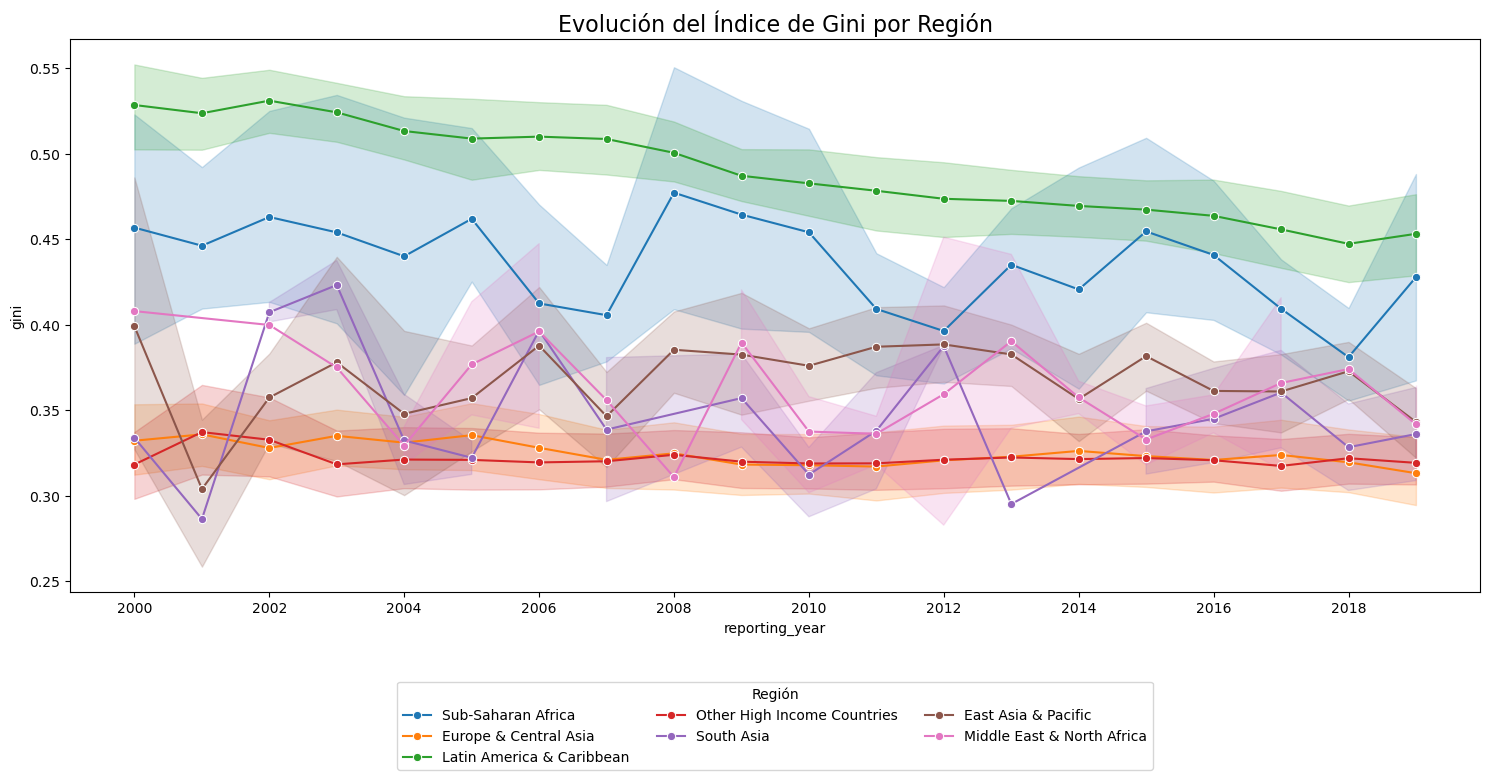

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el tamaño del gráfico (más ancho)
plt.figure(figsize=(15, 8))

# Crear el gráfico de líneas sin sombras y sin etiquetas al final
sns.lineplot(data=df_merged, x='reporting_year', y='gini', hue='region_name', marker='o', style=None)

# Ajustar la leyenda para que esté centrada en la parte inferior
plt.legend(title='Región', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)

# Añadir el título
plt.title('Evolución del Índice de Gini por Región', fontsize=16)

# Ajustar diseño para evitar el corte de la leyenda
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Grafico 8

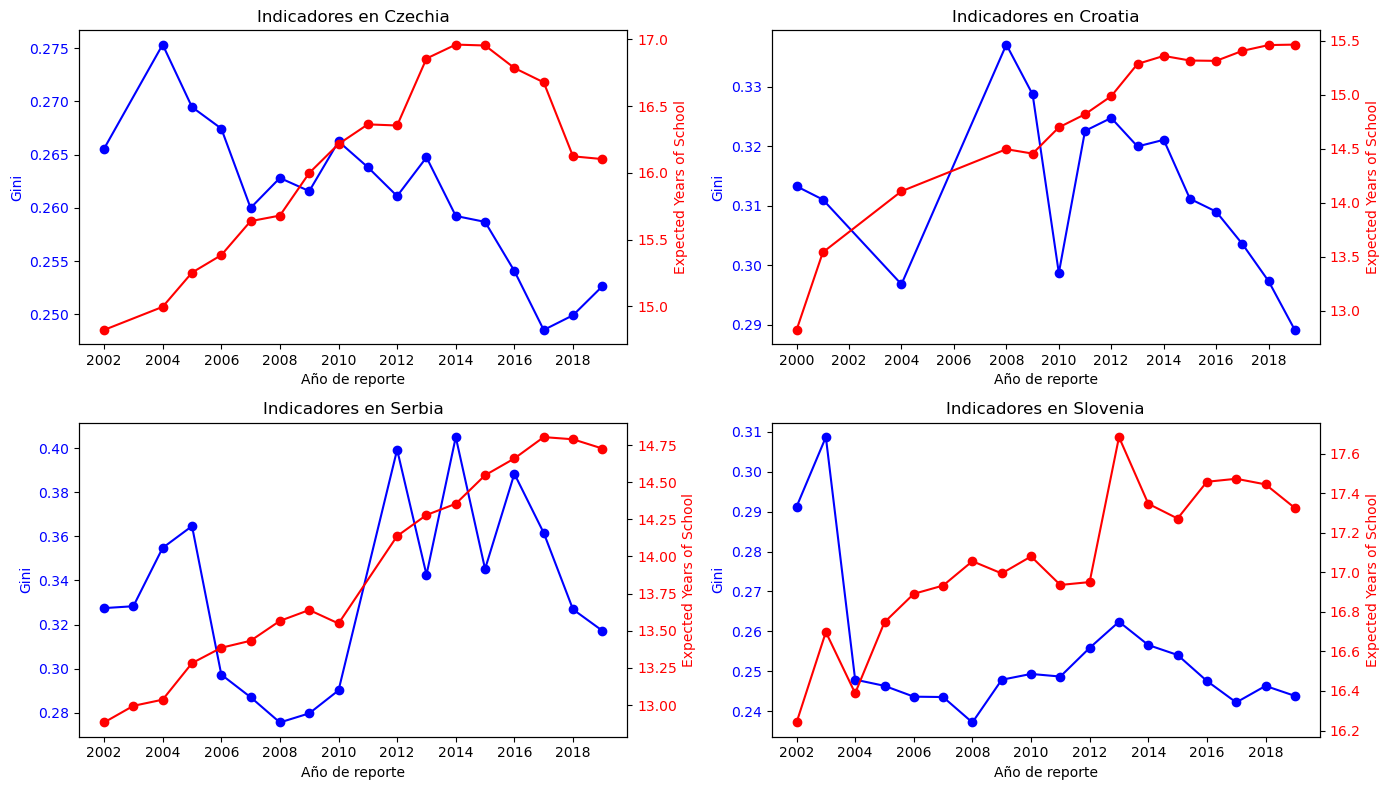

In [20]:
# Lista de países a incluir en el análisis
paises = ['Czechia', 'Croatia', 'Serbia', 'Slovenia']

# Filtrar el DataFrame para los países seleccionados
df_filtered = df_merged[df_merged['country_name'].isin(paises)]

# Crear la estructura de subplots (en este caso 4 filas, 2 columnas para 8 países)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
axes = axes.flatten()  # Convertir el array de ejes en una lista plana para fácil acceso

# Iterar a través de los países y crear un gráfico para cada uno
for i, pais in enumerate(paises):
    # Filtrar los datos para el país específico
    df_pais = df_filtered[df_filtered['country_name'] == pais]

    # Derretir el DataFrame para crear la tabla dinámica como antes
    df_pivot = df_pais.melt(id_vars=['country_name', 'reporting_year'], 
                            value_vars=['gini', 'expected_years_school'], 
                            var_name='indicator')

    # Crear la tabla dinámica
    result = df_pivot.pivot_table(index='indicator', columns='reporting_year', values='value')

    # Seleccionar el eje actual
    ax1 = axes[i]

    # Graficar el primer indicador ('gini') en el eje principal (ax1)
    ax1.plot(result.columns, result.loc['gini'], marker='o', color='b', label='Gini')

    # Añadir etiquetas para el primer eje
    ax1.set_xlabel('Año de reporte')
    ax1.set_ylabel('Gini', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Crear un segundo eje (ax2) que comparte el mismo eje x con ax1
    ax2 = ax1.twinx()

    # Graficar el segundo indicador ('expected_years_school') en el eje secundario (ax2)
    ax2.plot(result.columns, result.loc['expected_years_school'], marker='o', color='r', label='Expected Years of School')

    # Añadir etiquetas para el segundo eje
    ax2.set_ylabel('Expected Years of School', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Título del subgráfico para el país
    ax1.set_title(f'Indicadores en {pais}')

# Ajustar el layout para que los subgráficos no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Grafico 9

### Top 5 Países con Menor Índice de Gini

Este gráfico destaca los **cinco países** con el **menor índice de Gini**, lo que indica una distribución más equitativa de los ingresos. Los hallazgos son los siguientes:

1. **Eslovenia (0.254)**: Este país presenta el índice de Gini más bajo, reflejando políticas efectivas de bienestar social y una fuerte inversión en educación y salud.
2. **República Checa (0.261)**: Con un sistema de protección social robusto, la República Checa mantiene una distribución equitativa de ingresos, lo que contribuye a la estabilidad económica.
3. **Bielorrusia (0.276)**: A pesar de los desafíos políticos, Bielorrusia muestra una baja desigualdad gracias a su modelo de economía planificada que prioriza la equidad.

- **Implicaciones**: Estos países ilustran cómo las políticas de bienestar y la inversión en servicios sociales pueden contribuir a una distribución más equitativa de la riqueza. Las lecciones aprendidas de estas naciones pueden servir de modelo para otros países que buscan reducir la desigualdad.

En resumen, el análisis del top 5 de países con menor índice de Gini destaca la importancia de las políticas sociales en la promoción de una economía más equitativa y justa.


C:\Users\osanc\AppData\Local\Temp\ipykernel_20940\252729473.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




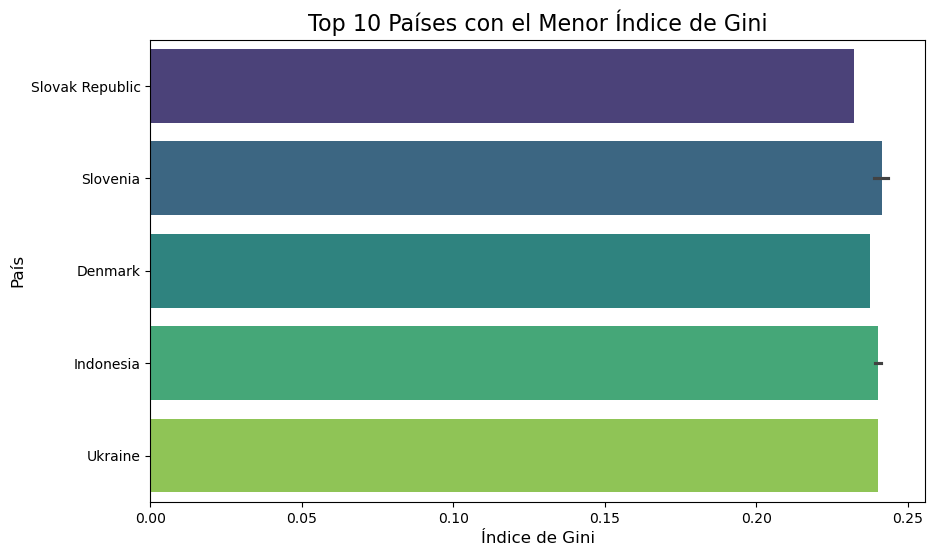

In [22]:



top10_menor_gini = df_merged.sort_values(by='gini', ascending=True).head(10)

# Crear un gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='gini', y='country_name', data=top10_menor_gini, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Top 10 Países con el Menor Índice de Gini', fontsize=16)
plt.xlabel('Índice de Gini', fontsize=12)
plt.ylabel('País', fontsize=12)

# Mostrar el gráfico
plt.show()

## Grafico 10

### Top 5 Países con Mayor Índice de Gini

Este gráfico destaca los **cinco países** con el **mayor índice de Gini**, indicando una alta desigualdad en la distribución de ingresos. Los hallazgos son los siguientes:

- **Implicaciones**: La alta desigualdad en estos países sugiere la necesidad urgente de políticas que aborden la redistribución de la riqueza, el acceso a la educación y la mejora de las condiciones de vida de los sectores más vulnerables.

En resumen, el análisis del top 5 de países con mayor índice de Gini destaca los retos que enfrentan estas naciones en la lucha contra la desigualdad y la pobreza, subrayando la importancia de estrategias inclusivas y sostenibles.


C:\Users\osanc\AppData\Local\Temp\ipykernel_20940\3981682424.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




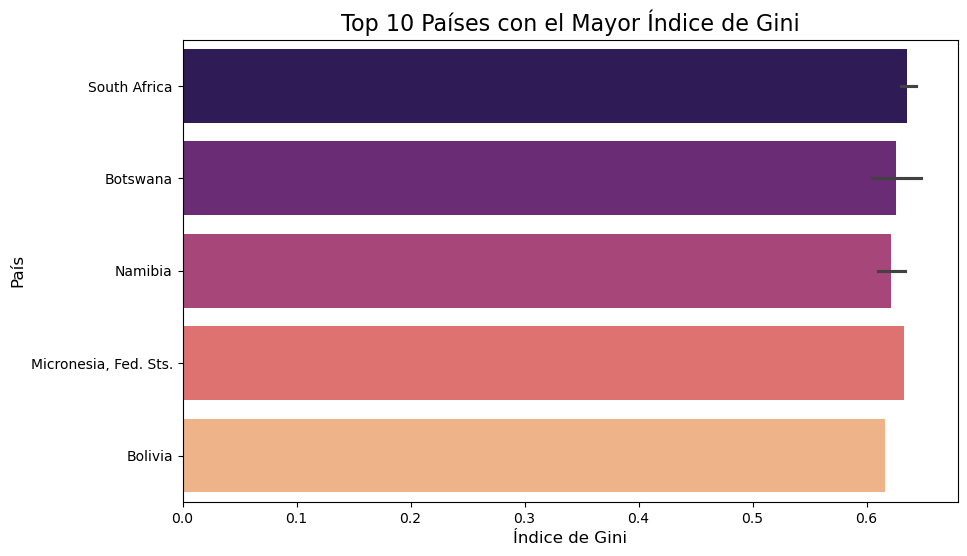

In [23]:
top10_mayor_gini = df_merged.sort_values(by='gini', ascending=False).head(10)

# Crear un gráfico de barras para el Top 10 de mayor índice de Gini
plt.figure(figsize=(10,6))
sns.barplot(x='gini', y='country_name', data=top10_mayor_gini, palette='magma')

# Añadir títulos y etiquetas
plt.title('Top 10 Países con el Mayor Índice de Gini', fontsize=16)
plt.xlabel('Índice de Gini', fontsize=12)
plt.ylabel('País', fontsize=12)

# Mostrar el gráfico
plt.show()